In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [2]:
df1 = pd.read_csv('True.csv', encoding='ISO-8859-1')
df1

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
df2 = pd.read_csv('Fake.csv', encoding='ISO-8859-1')
df2

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


#### we consider 1 as real news and 0 as a fake news

In [4]:
df1['label']=1

In [5]:
df2['label']=0

In [6]:
df1.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [7]:
df2.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [8]:
df=pd.concat((df1[:2000],df2[:2000]),ignore_index = True)

In [9]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
3995,Watch Legendary Reporter Ted Koppel Tell Hann...,"With the cool, calm authority that comes with ...",News,"March 26, 2017",0
3996,Someone Just Showed What Trump Was Doing At H...,One day after Trump had his 12th golfing trip ...,News,"March 26, 2017",0
3997,Trump Accidentally Makes Democrats Look Great...,Less than 24 hours after Trump claimed he woul...,News,"March 26, 2017",0
3998,Kremlin Threatens Trump: Stop Leaking Like A ...,Snitches get stitches is Kremlin s message t...,News,"March 26, 2017",0


In [10]:
df.shape

(4000, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4000 non-null   object
 1   text     4000 non-null   object
 2   subject  4000 non-null   object
 3   date     4000 non-null   object
 4   label    4000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 156.4+ KB


# Data cleaning

In [12]:
df['news']=df['title'] + df['text']

In [13]:
df.head()

,title,text,subject,date,label,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANIKET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANIKET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df.isnull().sum()/len(df)*100

title      0.0
text       0.0
subject    0.0
date       0.0
label      0.0
news       0.0
dtype: float64

In [18]:
df.duplicated().sum()

11

In [19]:
df=df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(3989, 6)

In [22]:
df.head()

,title,text,subject,date,label,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


# EDA

In [23]:
df.head()

,title,text,subject,date,label,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


<Axes: ylabel='label'>

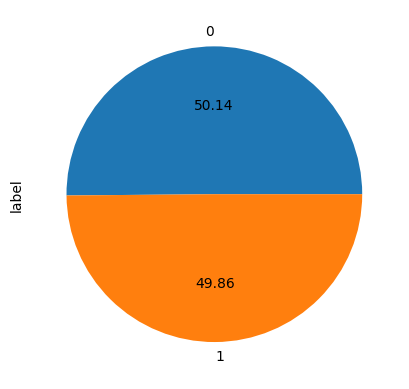

In [24]:
df['label'].value_counts().plot(kind='pie',autopct="%0.2f")

In [25]:
df

,title,text,subject,date,label,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
3995,Watch Legendary Reporter Ted Koppel Tell Hann...,"With the cool, calm authority that comes with ...",News,"March 26, 2017",0,Watch Legendary Reporter Ted Koppel Tell Hann...
3996,Someone Just Showed What Trump Was Doing At H...,One day after Trump had his 12th golfing trip ...,News,"March 26, 2017",0,Someone Just Showed What Trump Was Doing At H...
3997,Trump Accidentally Makes Democrats Look Great...,Less than 24 hours after Trump claimed he woul...,News,"March 26, 2017",0,Trump Accidentally Makes Democrats Look Great...
3998,Kremlin Threatens Trump: Stop Leaking Like A ...,Snitches get stitches is Kremlin s message t...,News,"March 26, 2017",0,Kremlin Threatens Trump: Stop Leaking Like A ...


In [26]:
df['num words'] = df['news'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df['num char'] =df['news'].apply(len)

In [28]:
df['num_sentences']=df['news'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [29]:
df[['num_sentences','num words','num char']].describe()

,num_sentences,num words,num char
count,3989.000000,3989.000000,3989.000000
mean,15.373026,460.043369,2544.622462
std,9.202952,234.099597,1307.613233
min,1.000000,42.000000,218.000000
25%,9.000000,345.000000,1876.000000
50%,14.000000,439.000000,2416.000000
75%,20.000000,572.000000,3146.000000
max,117.000000,1624.000000,8723.000000


<Axes: xlabel='num char', ylabel='Count'>

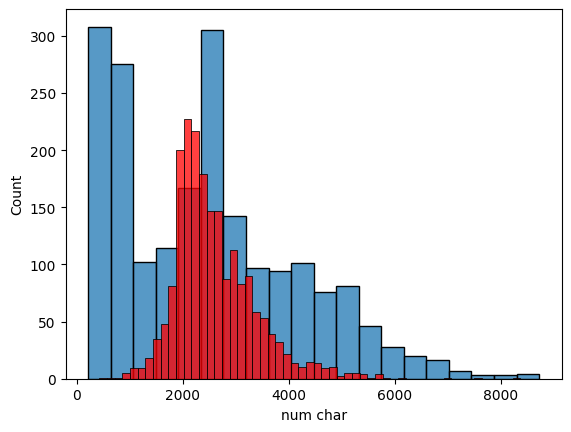

In [30]:
sns.histplot(df[df['label'] == 1]['num char'])
sns.histplot(df[df['label'] == 0]['num char'],color='red')

<Axes: xlabel='num words', ylabel='Count'>

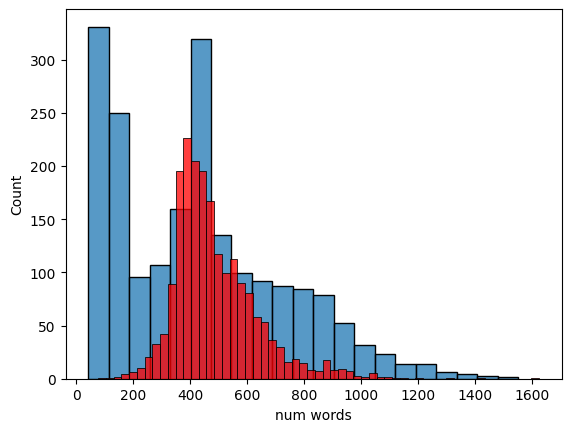

In [31]:
sns.histplot(df[df['label'] == 1]['num words'])
sns.histplot(df[df['label'] == 0]['num words'],color='red')

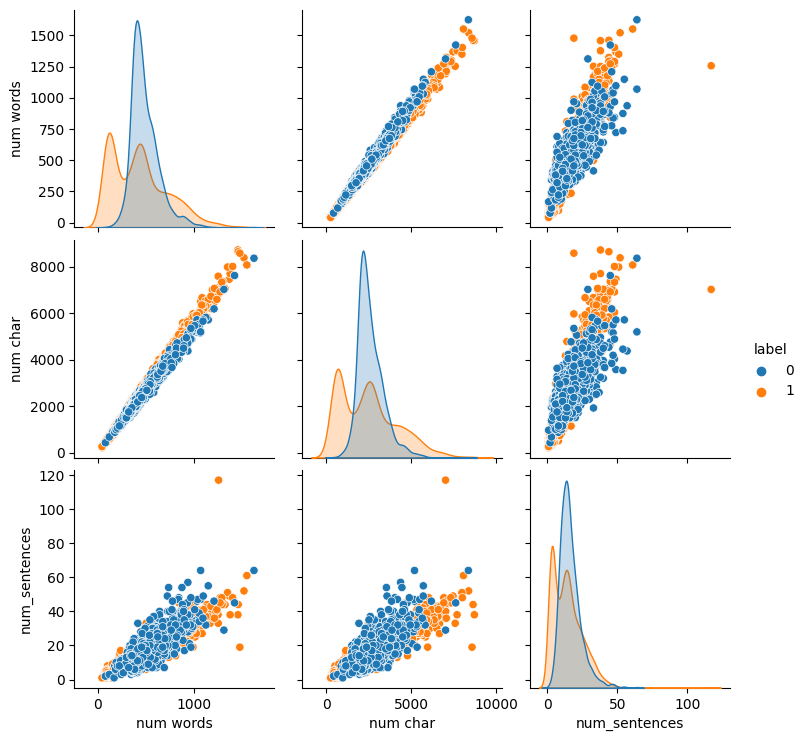

In [32]:
sns.pairplot(df,hue='label')

<Axes: >

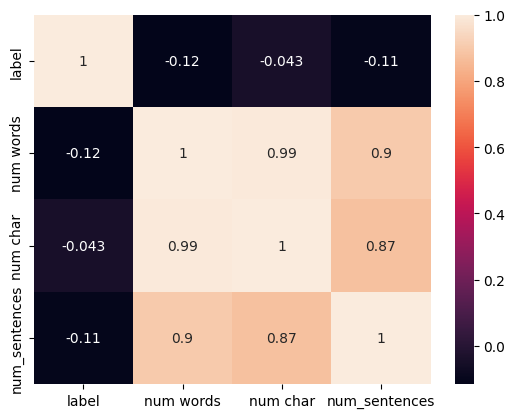

In [33]:
sns.heatmap(df.corr(),annot=True)

# data processing

# remove URLS

In [34]:
import re

In [35]:
def remove_URL(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    
    return pattern.sub(r'',text)

In [36]:
remove_URL('https://www.youtube.com/watch?  my namr aniket')

'  my namr aniket'

In [37]:
df['news']=df['news'].apply(remove_URL)

# remove tages

In [38]:
def remove_tags(text):
    pattern=re.compile(r'<.*?>')
    
    return pattern.sub(r'',text)

In [39]:
remove_tags("<p>This is <b>bold</b> and <i>italic</i>.</p>")

'This is bold and italic.'

In [40]:
df['news']=df['news'].apply(remove_tags)

#### 

#### 
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()  # LOWER CASE
    text = nltk.word_tokenize(text)  # TOKENIZATION
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
                
    text = y[:]
    y.clear()
    
    # Perform stemming
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANIKET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANIKET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
transform_text('Sunnistan: US and Allied â\x80\x98Safe Zoneâ\x80\x99 Plan to Take Territorial Booty in Northern SyriaPatrick Henningsen  21st Century WireRemember when the Obama Administration told the world how it hoped to identify 5,000 reliable non-jihadist  moderate  rebels hanging out in Turkey and Jordan, who might want to fight for Washington in Syria? After all the drama over its infamous  train and equip  program to create their own Arab army in Syria, they want to give it another try.This week, Pentagon officials announced their new plan to train up to 7,000 more  moderate  fighters, but this time the project would take place inside Syria (and to hell with international law).We re told that this was requested by Ankara, and with all NATO allies singing the same hymn   claiming that this new effort will help in securing Turkey s porous border with Syria, or so the story goes. Washington s political cover for this is fashioned from the popular post-Paris theme: to protect civilized Europe from invading hordes and the terrorists who hide among them, as stated in the Wall Street Journal: The program would address part of the tense and long-running dialogue between Washington and Ankara over sealing the border, which Western governments have long complained is an avenue for extremists to leave Syria and travel internationally, The timing of this announcement seemed uncanny against the backdrop of an unlikely ISIS  suicide bomb  terrorist attack, in Turkey, of all places, where the victims just happened to be 14 German tourists, feeding perfectly into Europe s new binary fear set of terrorism and immigration. Shades of GLADIO, undoubtedly (but you won t see western journalists entertaining such conspiracy theories).Our friends at Nation Builders Inc are banking on the global public suffering from Syria fatigue, but now is the time to really pay attention. The west s real agenda for the region is starting to unfold Despite all of US-led Coalition s scandals, lies, epic failures, false flags and official conspiracy theories, the mainstream narrative on Syria persists. It s on our TV screens and in our newspapers constantly   from Los Angeles to London, from Paris to Riyadh, every politician and pundit seems to have an opinion about,  what to do with Syria?  Everyone, except the Syria people  themselves, who like the people of Iraq, Libya, Afghanistan, Yemen and ever other country that s found itself under the cleaver of western interests   are never afforded any say in their own destiny. As is tradition in Washington, London and Paris, the only Syrian voices which count are the ones who have been hand-picked by western technocrats and approved by the Saudi royal family to form their ever-changing  recognized  government-in-exile, the Syrian National Council. Currently, that could be Riad Hijab,  George Sabra or Khaled Khoja. Next week, it could be three others, depending on who has fallen in, or out of favor with Washington or Riyadh.To anyone who was listening close enough early on in the conflict, you would have heard determined members of the western-backed  Syrian Opposition  admitting how they would,  make a deal with the devil if that s what it takes to win power.  Four years later, we now see that is exactly what happened, but whether you believe that this  devil is US-led Coalition, or terrorist armies fighting groups (or both) might be cause for debate. Others will argue over which is the bigger devil   is it the Wahabist-Salafist terrorist brigades like al Nusra Front and Islamic State, or is it the West and its GCC partners?The unfortunate reality is that these two devils are not mutually exclusive. The West and its partners not only created this  terror  crisis, but did so with the intent of unveiling a grand  solution  to the problem.Plans A-ZThe terrorist enclave in Syria is designed for purpose   to implant a hostile metastasis right in the middle of the very territory which neocolonial powers plan to tear away from the barely sovereign nations of Iraq and Syria.Since 2011, the western-led cartel has deployed various levels of international subterfuge in Syria, starting with Plan A: the Arab Spring method   igniting a popular street uprising that might capture the world s attention for 15 minutes   enough to generate some high-quality evocative imagery and a social media storm to carry memes of liberty around the globe, inspiring the people on the streets (and on Twitter) to demand  change . Their cries for freedom would then be backed up by the US State Department, along with its functionaries at Human Rights Watch and Amnesty International America, and other Open Society Institute-funded NGOs and  human rights  organizations. Obviously, this did not work. Next, Plan B: the political opposition suddenly transcended into an armed, paramilitary opposition, followed by brutal violence and killing on both sides. The US and its allies wasted no time, pledging weapons, training, cash and logistical support to the armed opposition. The west set up its own parallel government for Syria abroad, but it failed to gain any traction with the Syria people. Then came Plan C: this  opposition  would be quickly overrun and absorbed into a massive array of mostly foreign jihadi and mercenary soldiers of misfortune and other assorted terrorists. This fed into an already established  War on Terror  western narrative. Now the west had a familiar entry point into the fight. The Washington-London-Paris-Tel-Aviv-Riyadh-Doha-Ankara Axis hoped that these terrorists would do the job of overthrowing the government of Bashar al Assad in Damascus, and collapse the country into a spirally pit of sectarian and tribal chaos. Who could blame them? After all, it worked in Libya in late 2011.Fast forward to 2016, having failed to overthrow Assad and implode the nation-state of Syria, the men and women of Nation Builders Inc and their muscles in Brussels (NATO), are quickly moving to Plan D: take territory. That s not to say plans A through D weren t always in the schematics   they certainly were, and further back than many people would dare to speculate.We now know from Wikileaks cables that this operation goes back to at least 2006, but in reality, it s probably much earlier than that. Taking the long view of history and the audacious building, and rebuilding, of a Euro-centric empire in the Middle East, one could say the process began the day the Sykes-Picot Agreement was signed in 1916. Concealed between those post-colonial lines drawn exactly 100 years ago, was the latent potential for the very conflicts and uncivil wars we are seeing today. If those borders are redrawn once again, you can be certain that they will be drawn by the very same powers involved a century ago. Whatever the arrangement, it will be to weaken, not strengthen the region, and certainly not strengthen any of the present nation states in the region, especially Syria. Proprietary powers will want any new states to be stuck in a perpetual state of neocolonial dependency, with an emphasis on financial and security dependency.Mice and Men21WIRE was one of the first news sources to warn about Washington s initial impulse back in 2014 when it began calling for a  No Fly Zone  in Northern Syria. It was clear that a problem, reaction, solution dialectic was in play, with ISIS being the object of the public s reaction. That plan might have come to fruition in the fall of 2015, but a funny thing happened on the way to the UN General Assembly in New York City. Later that week, Russia announced that it would be inserting itself, and its Air Force, into the Syrian quagmire, and with that, thwarted any master plan for a US-Turkey (NATO) controlled No Fly Zone along the Turkish-Syrian border. Suffice to say, that Russia already knew NATO s next move and acted accordingly, and with purpose.When asked two days ago about the prospect of the Washington DC latest brainchild, Train and Equip 2.0, this time inside Syria, here were my initial thoughts: We now know why, and it has more to do with what s beneath the sand than what s on top.As any good pirate will tell you   if you want to claim your share of the booty, you have to do your share of the killing. The Truth About  Train and Equip The previous  train and equip  program ended with Washington s military brass paraded in front of the Senate Armed Services Committee, before being roundly lambasted for failing to train even a handful of  moderate rebels , this after being awarded $500 million by the US taxpayer to get er done. When originally announced amid much fanfare, the public were told that the US government, in conjunction with the CIA, would be arming and training  moderate  militants in Turkey, Jordan or at a base in Saudi Arabia   before sending them to fight inside Syria. Washington claims that these new trainees were meant to fight ISIS, and not the Syrian government forces, but judging by the unwavering  regime change  rhetoric from the west, it would be highly naive to think that all this was strictly for ISIS.Nine months into the train and equip project, US Army Gen. Lloyd Austin III, acknowledged in Sept. 2015 that they had only managed to get  four or five  on the battlefield by then. Not one member of the media challenged this statement, probably because most were happy with the answer given   one which gave any hawkish critics of the Obama administration the pound of flesh they wanted and served to only intensify more calls before the new year for US  boots on the ground  in Syria. Doves loved it because it seemed to prove that backing proxies doesn t work, and that the best solution was to call it quits. For the sanguine mainstream media, it served-up that all-too familiar government narrative, of a  cock-up, not a cover-up.  This is the media s natural default position. In other words,  Well, it didn t work out, but that s nothing new with our incompetent government. Nothing to see here, move along.  To ask how the money disappeared, or really inquire into how it costs $500 million to train only five men   apparently was way too much work for the media. Not one  journalist  stopped to ask, if only 5 fighters were trained and dispatched, then what happened to the half a billion dollars?The real answer to that question should be self-evident to anyone studying reports on the ground in Syria, and is way too uncomfortable for the US media to stomach   that the US  train and equip  program provided the necessary official cover to allow the prosecution of a dirty war under the table. It wasn t a failure like fall guy Gen. Lloyd Austin will have you believe, it was a success.Judging by the proliferation of heavy weaponry and other lethal arms that have made it into the hands of al Qaeda in Syria (al Nusra Front), ISIS, Jaysh al Islam and others   it s clear that Uncle Sam s generous donation of $500 million has definitely been used to equip, if not train, those  rebels  in Syria.Middle East commentator and analyst Sharmine Narwani explains the West s perennial dilemma when trying to identify who their  moderates  are in Syria: For years, Washington has insisted there are armed  moderate  groups in Syria, but have gone to great lengths to avoid naming these  moderates.  Why? Because if moderates were named and identified, the US would have to be very, very certain that no past, present or future  atrocity video  would surface to prove otherwise. And the US could not guarantee this with any of the groups they have armed, trained or financed in Syria over the past five years. The next  train and equip  round will be more focused, and will be used to secure the following  The map above is from July 2015, but still represents the current military chessboard in Syria.Safe Zone =  Sunnistan Somehow it feels like 1998 all over again, with bad memories of the KLA in Kosovo, imported jihadist fighters in Bosnia, and NATO lording over a newly balkanized region.When you hear US officials like John McCain or clueless Republican presidential candidates like Marco Rubio or Carly Fiorina, all crowing for a  Safe Zone  in northern Syria, this is what they are referring to (see map above). Their  safe zone  just so happens to be in the exact same area where ISIS is currently holding court. It s a  safe zone  alright, but not for refugees and  Syrians fleeing the evil Bashar al Assad    rather, the  safe zone  will be for an array of  rebel  and terrorist fighters, part of a defacto Sunni state-lette in waiting.So the US-led Coalition s  safe zone  is the very Caliphate that Americans are decrying.For anyone requiring proof that such a grand chessboard is in play in Syria, they need look no further than a set of US airstrikes that took place before Christmas. On December 6, 2015,  US fighter bombers struck a Syrian military base located in the village of Ayyash in Deir Ezzor Province, east of Raqqa, which killed 3 Syrian Arab Army (SAA) soldiers and wounded additional others. Naturally, the Pentagon swiftly denied that any such attack took place. What happened after this incident was extremely telling, as explained by global affairs analyst Mike Whitney from Counterpunch Magazine: It s also worth noting, that according to South Front military analysis, the US bombing raid coincided with a  a full-scale ISIS offensive on the villages of Ayyash and Bgelia.  In other words, the US attack provided sufficient air-cover for ISIS terrorists to carry out their ground operations. Was that part of the plan or was it merely a coincidence? So the US air force was coordinating with ISIS boots on the ground, to achieve a common military objective. But it didn t end there. Less than 24 hours after the attack, US warplanes bombed the village of Al-Khan in north-eastern Syria killing 26 Syrian civilians including at least four women and seven children and four women. The message the US military is sending with these lethal attacks is that it wants to control the air-space over east Syria where it plans to remove ISIS and establish a de facto Sunni state consistent with its scheme to break Syria and Iraq into smaller cantons governed by local warlords, Islamic fanatics, and US puppets. Also taking place at the same moment on Dec 6th, was Turkey s quiet little invasion into northern Iraq, sending hundreds of troops and at least 20 tanks into territory north of Mosul, right between the Kurds and ISIS. It should be noted that this illegal incursion by NATO member Turkey was not approved by the Iraqi government in Baghdad, and Iraqi PM Haider al-Abadi called for Turkey to  immediately withdraw its troops.  Judging by Washington s silence on the matter, it s obvious that the US gave Turkey its full blessing. Here, Zero Hedge astutely points out the obvious: Most importantly of all, right on what Al-Araby al-Jadeed claims is the smuggling route for illegal ISIS crude into Turkey from Iraq.  Not surprisingly, Turkey s sudden move also came at the same time that Russia began to publicly expose Turkey s clandestine role in facilitating the ISIS oil trade, as well as launching airstrikes to destroy ISIS oil convoys moving from Syria into Turkey. And then Turkish leader Recep Tayyip Erdo an (photo, left) places his military assets at the very location where stolen ISIS oil makes its way from Iraq into Turkey? Hardly a coincidence.Make no mistake, both ends of NATO s military axle, the United States and Turkey, along with their Saudi-backed boots on the ground in ISIS and al Nusra   have each made critical strategic moves in unison, and with a specific military purpose each time, nudging towards securing territory. Once each key piece is finally in position, all that is required is a new  crisis , either in the region, or in Europe, or in America   to allow the Axis powers to move in quickly and take what is needed to implement the next phase of the game, whether that s creating a Kurdish canton, or a Sunni state-lette. Such moves will rarely be covered by the western international media.To be perfectly clear, the terms  Sunni  and  Shia  are the favored sectarian lexicon used by Nation Builders Inc and its international partners in Riyadh and Tel Aviv. My intention here is not to reduce the Muslim world down to this paradigm, but the architects of instability will use these terms, over and over   in their attempt to both marginalize and dehumanized Muslims for their own selfish ends.What s the  safe zone  for? As the US-led Coalition steps up its 18 month-long Punch  n Judy air operation to supplant ISIS from Raqqa, those western-backed jihadis will later require a safe corridor to flee but still remain connected to their Turkish supply lines. Washington s  safe zone  would also provide a much-needed safe haven for  rebels  who have been sent packing by the Syrian government from towns like Homs and others, as part of a painstaking disarming and reconciliation process between the Assad government and  opposition  rebels who are willing to participate in the program. Once the NATO-GCC Axis has established a mini protectorate inside of Syria, this will provide everything ISIS, al Nusra, Ahrar al-Sham, Turkmens et all will need; a secure launching pad for incursions further inside Syria   which will certainly guarantee a longer, protracted conflict in Syria   and beyond.This little Sunni wedge is also conveniently located next to a large rebel-terrorist contingent in Syria s northwestern Idlib governorate (province). Syria s border with Turkey has been porous from the beginning of the conflict, so the proposed  safe zone  will allow Turkey to maintain this status quo   where it has been continuously allowing the free-flow of weapons, rebels and terrorist fighters alike, along with oil, narcotics and human trafficking   to move freely through its southern border with Syria.If  regime  change  rhetoric is anything to go by, along with turning a blind eye to NATO member Turkey s role in facilitating supply lines and safe passage for al Qaeda and ISIS, then Washington s agenda is fairly transparent here. If they can establish a  internationally recognized  safe zone and a No-Fly Zone on top of it, central planners believe they will have the platform they need to eventually destroy Damascus, install their own western puppet, and then carve up Syria and northern Iraq accordingly. ISIS RAT-LINES: Black market oil has been a key component to carrying on both conflicts in Syria, and Iraq.For the architects of instability in Washington, one crucial benefit of carving out Sunni territory in both northern and eastern Syria is that available oil will help fund all of their paramilitary and terrorist needs   making it sustainable. To guarantee this uninterrupted income stream from black market oil which is presently making its way out of Syria and into Turkey and via Kurdistan, help is required from the Kurdish Regional Government (KRG) and other stakeholders, including the British-Turkish firm Genel Energy, just one firm who is providing the end-run to market for illicit ISIS oil. Ditto for a key mover and shaker in Raqqa s new Rockefeller class, Bilal Erdogan, the son of Turkish president, who according to numerous recent reports has already amassed a small fortune from the lucrative oil-for-terror trade.This is a problem, but one which Washington, London and Paris are not overly concerned with, much less upset about. Iraqi, Kurdish and Turkish opposition officials have accused Turkish governments and the KRG of deliberately allowing some of these smuggling operations to take place.Even as provisional state-lettes and cantons are conjured around it, there is no guarantee that Greater Kurdistan will ever see the light of day if Nation Builders Inc having anything to say bout it. The promise of Greater Kurdistan is as important to neocolonialists, than the reality of a Greater Kurdistan. Turkey also has its own interests and ambitions, and a Greater Kurdistan is not compatible with them. Iraq is not crazy about the idea either, because of obvious financial and energy resource reasons. So they remain in limb indefinitely, even as smaller quasi-Kurdish entities sprout up around the KRG. Turkey has its own ongoing  Kurdish problem  within Turkish borders, so Ankara will naturally view any expressions of Kurdish autonomy around it as a threat and potential inspiration for international Kurdish solidarity. Ruling over the Kurds means keeping them divided, and playing them off against their neighbors.There are those within the Turkish establishment who believe there are old scores still unsettled   in reclaiming Turk territory in both Syria and Iraq.SEE ALSO: SPECIAL REPORT: ISIS Oil? Follow the Money (Back to Europe)Here is where Sunnistan proper can emerge, coming into its own once set pieces are in place in Iraq and across Kurdistan, as Mike Whitney explained: So it looks like an agreement has been struck between Turkey, the KRG and the United States to seize parts of northern Iraq and eastern Syria to create a de facto Sunni state that will be jointly-controlled by Ankara and Washington.  It also looks like Obama has agreed to use dodgy jihadi-proxies (aka Terrorists) to work alongside US Special Forces to carry out future military operations.  So while the effort to remove Assad has been temporarily put on the backburner, the determination to destroy Syria is as strong as ever.  Another dismembered part of old Syria and Iraq which central planners are hoping to hack-off is an area called Rojava (see map above), or  Western Kurdistan . This region in northern Syria, formerly known as Syrian Kurdistan, gained its autonomy in November 2013 as part of the ongoing Rojava Revolution. The Kurdish defense forces here are known as the YPG (People s Defense Units) and are not on friendly footing with neighboring Turkey, for a number of reasons, not least of all because YPG defense forces present resistance to both al Nusra and ISIS encroachments into all three Rojava cantons. For Turkey, this is bad for business. How Rojava will factor into Washington s plans is not clear yet, but it occupies the most strategic squares on the chessboard.Make no mistake, the history s actors are all in for this plan. Do not be fooled by talk of  peace and stability  or humanitarian platitudes from western leaders, the UN, or the fair weather international community.Another indication that these plans have the full backing of the neoconservative illiterati, and Israel too, was PNAC walrus and former US Ambassador to the UN John Bolton s recent article in the establishment s daily journal of political posterity, the New York Times, where he states: Today s reality is that Iraq and Syria as we have known them are gone. The Islamic State has carved out a new entity from the post-Ottoman Empire settlement, mobilizing Sunni opposition to the regime of President Bashar al-Assad and the Iran-dominated government of Iraq. Also emerging, after years of effort, is a de facto independent Kurdistan. Central planners will happily frame this geopolitical scenario within the preferred theme of Sunni vs Shia  sectarian strife  in the region, which just happens to suit the interests and desires of both Saudi Arabia and Israel. Bolton confirms this: If, in this context, defeating the Islamic State means restoring to power Mr. Assad in Syria and Iran s puppets in Iraq, that outcome is neither feasible nor desirable. Rather than striving to recreate the post-World War I map, Washington should recognize the new geopolitics. The best alternative to the Islamic State in northeastern Syria and western Iraq is a new, independent Sunni state. Not so fast Mr. Ambassador. The Islamic State is the Sunni State.So for all intents and purposes, he s calling for the establishment of the Caliphate (funny how this goes right over the heads of  conservatives ). This is just one of many geostrategic moves which will guarantee instability and military conflict in the region for another 100 years, as well as provide a timely entr e through to Azerbaijan and into Iran, and later towards the Eurasian heartland of Dagestan (Russia s emerging energy center and geographic underbelly).In the meantime, expect to be pelted with endless propaganda about starving children in one town or another, changing week to week   with the usual slogans like,  we must act now! , and blaming Bashar al Assad for the suffering of his people. It s already wearing thin.Until the US and its NATO-GCC Axis stops flooding Syria and the region with weapons and terrorist fighters, and continues its policy of toppling secular nation-states   then any attempt at holding peace talks will end up back at square one, and stand as another exercise in futility.If the Syrian conflict has been good for one thing (and that s not to say it has), it s that the scripted western narrative, in all of its variations, has finally hit the wall of truth.***Author Patrick Henningsen is a writer, lecturer and global affairs analyst for international TV and radio. He is also the founder and co-editor of 21stCenturyWire.com.READ MORE SYRIA NEWS AT: 21st Century Wire Syria Files')

'sunnistan us alli plan take territori booti northern syriapatrick henningsen 21st centuri wirerememb obama administr told world hope identifi reliabl moder rebel hang turkey jordan might want fight washington syria drama infam train equip program creat arab armi syria want give anoth week pentagon offici announc new plan train moder fighter time project would take place insid syria hell intern law told request ankara nato alli sing hymn claim new effort help secur turkey porou border syria stori goe washington polit cover fashion popular theme protect civil europ invad hord terrorist hide among state wall street journal program would address part tens dialogu washington ankara seal border western govern long complain avenu extremist leav syria travel intern time announc seem uncanni backdrop unlik isi suicid bomb terrorist attack turkey place victim happen 14 german tourist feed perfectli europ new binari fear set terror immigr shade gladio undoubtedli see western journalist entertain

In [44]:
df['transformed_text']=df['news'].apply(transform_text)

,title,text,subject,date,label,news,num words,num char,num_sentences,transformed_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t...",860,4791,30,budget fight loom republican flip fiscal scrip...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...,690,4189,21,militari accept transgend recruit monday penta...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...,510,2885,17,senior republican senat mueller reuter special...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...,427,2544,16,fbi russia probe help australian diplomat nytw...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...,975,5309,40,trump want postal servic charg amazon reuter p...
...,...,...,...,...,...,...,...,...,...,...
3995,Watch Legendary Reporter Ted Koppel Tell Hann...,"With the cool, calm authority that comes with ...",News,"March 26, 2017",0,Watch Legendary Reporter Ted Koppel Tell Hann...,415,2185,18,watch legendari report ted koppel tell hanniti...
3996,Someone Just Showed What Trump Was Doing At H...,One day after Trump had his 12th golfing trip ...,News,"March 26, 2017",0,Someone Just Showed What Trump Was Doing At H...,353,1937,14,someon show trump golf club said photo one day...
3997,Trump Accidentally Makes Democrats Look Great...,Less than 24 hours after Trump claimed he woul...,News,"March 26, 2017",0,Trump Accidentally Makes Democrats Look Great...,674,3725,19,trump accident make democrat look great angri ...
3998,Kremlin Threatens Trump: Stop Leaking Like A ...,Snitches get stitches is Kremlin s message t...,News,"March 26, 2017",0,Kremlin Threatens Trump: Stop Leaking Like A ...,320,1755,7,kremlin threaten trump stop leak like coland r...


In [47]:
pip install wordcloud

     ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/152.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/152.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/152.1 kB ? eta -:--:--
     -------------- ---------------------- 61.4/152.1 kB 326.1 kB/s eta 0:00:01
     ------------------- ----------------- 81.9/152.1 kB 305.0 kB/s eta 0:00:01
     ---------------------- -------------- 92.2/152.1 kB 348.6 kB/s eta 0:00:01
     --------------------------------- -- 143.4/152.1 kB 425.3 kB/s eta 0:00:01
     ------------------------------------ 152.1/152.1 kB 432.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud

In [49]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
true_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

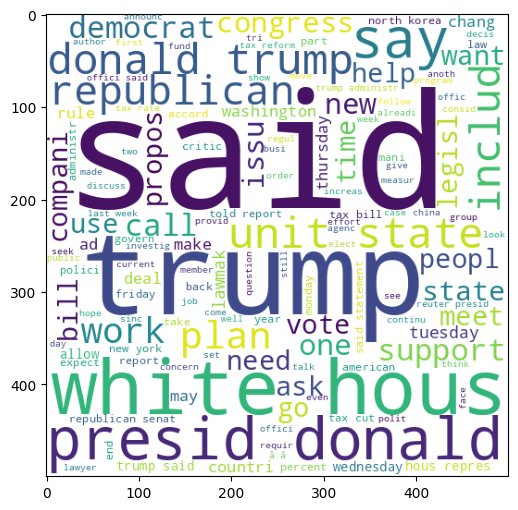

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(true_wc)

In [53]:
fake_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

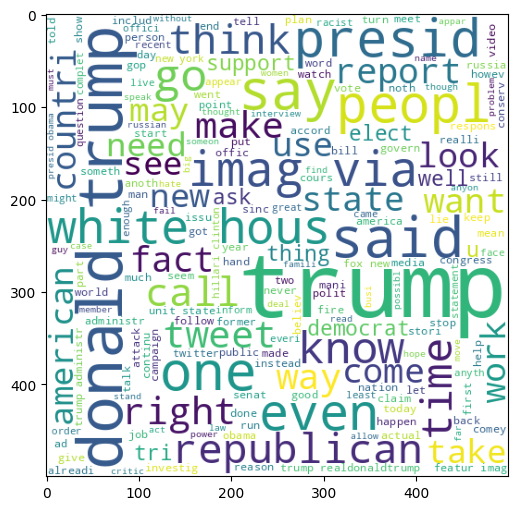

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)

# Model building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [56]:
cv=CountVectorizer()
tfidf= TfidfVectorizer()

In [57]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(3989, 25878)

In [59]:
y = df['label'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('accuracy score : ',accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print('precision score :',precision_score(y_test,y_pred1))

accuracy score :  0.8734335839598998
[[373  28]
 [ 73 324]]
precision score : 0.9204545454545454


In [67]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('accuracy score : ',accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print('precision score :',precision_score(y_test,y_pred2))

accuracy score :  0.9548872180451128
[[380  21]
 [ 15 382]]
precision score : 0.9478908188585607


In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('accuracy score : ',accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print('precision score :',precision_score(y_test,y_pred3))

accuracy score :  0.9824561403508771
[[393   8]
 [  6 391]]
precision score : 0.9799498746867168


In [70]:
pip install xgboost

     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.4/99.8 MB 13.5 MB/s eta 0:00:08
      --------------------------------------- 1.4/99.8 MB 18.1 MB/s eta 0:00:06
     - -------------------------------------- 2.5/99.8 MB 20.0 MB/s eta 0:00:05
     - -------------------------------------- 3.3/99.8 MB 17.4 MB/s eta 0:00:06
     - -------------------------------------- 4.8/99.8 MB 20.4 MB/s eta 0:00:05
     -- ------------------------------------- 6.4/99.8 MB 22.7 MB/s eta 0:00:05
     -- ------------------------------------- 7.4/99.8 MB 25.0 MB/s eta 0:00:04
     --- ------------------------------------ 9.6/99.8 MB 27.8 MB/s eta 0:00:04
     ---- ---------------------------------- 10.3/99.8 MB 26.2 MB/s eta 0:00:04
     ---- ---------------------------------- 11.2/99.8 MB 27.3 MB/s eta 0:00:04
     ---- ---------------------------------- 12.0/99.8 MB 27.3 MB/s eta 0:00:04
     ----- --------------------------------- 13.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9962406015037594
Precision -  0.9974747474747475
For  KN
Accuracy -  0.8784461152882206
Precision -  0.8275109170305677
For  NB
Accuracy -  0.9548872180451128
Precision -  0.9478908188585607
For  DT
Accuracy -  0.9912280701754386
Precision -  0.9974489795918368
For  LR
Accuracy -  0.9924812030075187
Precision -  0.9899749373433584
For  RF
Accuracy -  0.9974937343358395
Precision -  1.0
For  AdaBoost
Accuracy -  0.9974937343358395
Precision -  1.0
For  BgC
Accuracy -  0.9949874686716792
Precision -  0.9974683544303797
For  ETC
Accuracy -  0.9824561403508771
Precision -  0.9974025974025974
For  GBDT
Accuracy -  0.9962406015037594
Precision -  0.9974747474747475
For  xgb
Accuracy -  0.9924812030075187
Precision -  1.0


In [76]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [77]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.997494,1.000000
6,AdaBoost,0.997494,1.000000
10,xgb,0.992481,1.000000
0,SVC,0.996241,0.997475
9,GBDT,0.996241,0.997475
7,BgC,0.994987,0.997468
3,DT,0.991228,0.997449
8,ETC,0.982456,0.997403
4,LR,0.992481,0.989975
2,NB,0.954887,0.947891


In [84]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('ramodel.pkl','wb'))